In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

In [2]:
df=pd.read_excel("Cereals1.xls")
df.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
5,Apple_Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
6,Basic_4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
7,Bran_Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
8,Bran_Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813
9,Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12,35,25,2,1.00,0.75,18.042851


In [3]:
'''Create a table with the 5-number summary of all the numeric attributes.'''
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.723684,6.934211,93.657895,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,4.160444,4.473136,68.502565,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


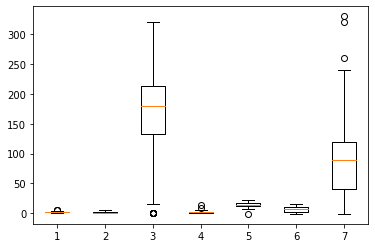

In [4]:
df_2 = df[["protein", "fat", "sodium", "fiber", "carbo", "sugars", "potass"]]
plt.boxplot(df_2)
plt.show()

In [5]:
'''For each of the numeric attributes (proteins upto vitamins) , identify and replace all 
missing data(indicated with -1) with the arithmetic mean of the attribute'''
df_1 = df[["carbo", "sugars", "potass"]]
for i in df_1:
    df[i]=df[i].replace(-1,df[i].mean())
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,93.657895,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.000000,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.000000,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.000000,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.000000,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.000000,25,1,1.0,1.00,51.592193


In [6]:
'''Create a table with the 5-number summary of all the numeric attributes after treating 
missing values. Do you think the strategy used in dealing with missing values was 
effective?'''
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.930575,7.038608,96.148892,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,3.737575,4.377048,66.688658,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,43.750000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.861842,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [7]:
'''For each of the numeric attributes (proteins upto vitamins), identify and replace all 
noisy data with the median of attribute. '''
df_2 = df[["protein", "fat", "sodium", "fiber", "carbo", "sugars", "potass"]]
for i in df_2:
    q1=df[i].quantile(0.25)
    q2=df[i].quantile(0.50)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    df[i]=np.where(df[i]<q1-(1.5*iqr),q2,df[i])
    df[i]=np.where(df[i]>q3+(1.5*iqr),q2,df[i])
df.describe()  


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.401316,1.013158,181.381579,1.792105,14.930575,7.038608,85.754155,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,0.875670,1.013159,60.186370,1.520220,3.737575,4.377048,48.049515,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,15.000000,0.000000,7.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,147.500000,0.750000,12.000000,3.000000,43.750000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.250000,1.000000,180.000000,1.625000,14.861842,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,110.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,4.000000,5.000000,320.000000,6.000000,23.000000,15.000000,230.000000,100.000000,3.000000,1.500000,1.500000,93.704912


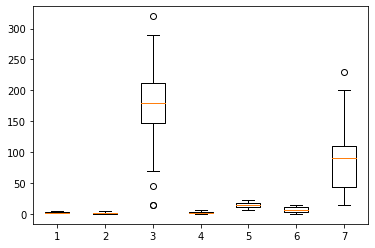

In [8]:
df_2 = df[["protein", "fat", "sodium", "fiber", "carbo", "sugars", "potass"]]
plt.boxplot(df_2)
plt.show()


In [9]:
'''Cross tabulate the type of cereal (hot vs cold) against the manufacture'''
pd.crosstab(df.type,df.mfr)

mfr,A,G,K,N,P,Q,R
type,,,,,,,
C,0,22,23,4,9,7,8
H,1,0,0,1,0,1,0


In [10]:
'''Which is the cereal with the best rating, worst rating?'''
print("Cereal with best rating:",end="")
print(df[df["rating"]==df["rating"].max()].name)

print("Cereal with worst rating:",end="")
print(df[df["rating"]==df["rating"].min()].name)

Cereal with best rating:2    All-Bran_with_Extra_Fiber
Name: name, dtype: object
Cereal with worst rating:9    Cap'n'Crunch
Name: name, dtype: object


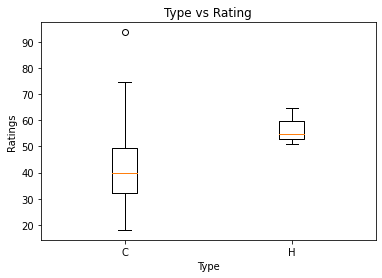

In [11]:
'''Plot a side-by-side boxplot comparing the consumer rating of hot vs. cold cereals.''' 
type_dict={}
for i in df["type"].unique():
    type_dict[i]=df[df["type"]==i].rating
plt.boxplot([x for x in type_dict.values()],labels=[x for x in type_dict.keys()])
plt.xlabel('Type')
plt.ylabel('Ratings')
plt.title('Type vs Rating')

plt.show()

In [12]:
'''Is there a relation between sugars, calories, carbs, and fat?'''
df_4=df[["sugars","calories","carbo","fat"]]
corr=df_4.corr()
print(corr)

            sugars  calories     carbo       fat
sugars    1.000000  0.574304 -0.501056  0.300349
calories  0.574304  1.000000  0.207615  0.510630
carbo    -0.501056  0.207615  1.000000 -0.312341
fat       0.300349  0.510630 -0.312341  1.000000


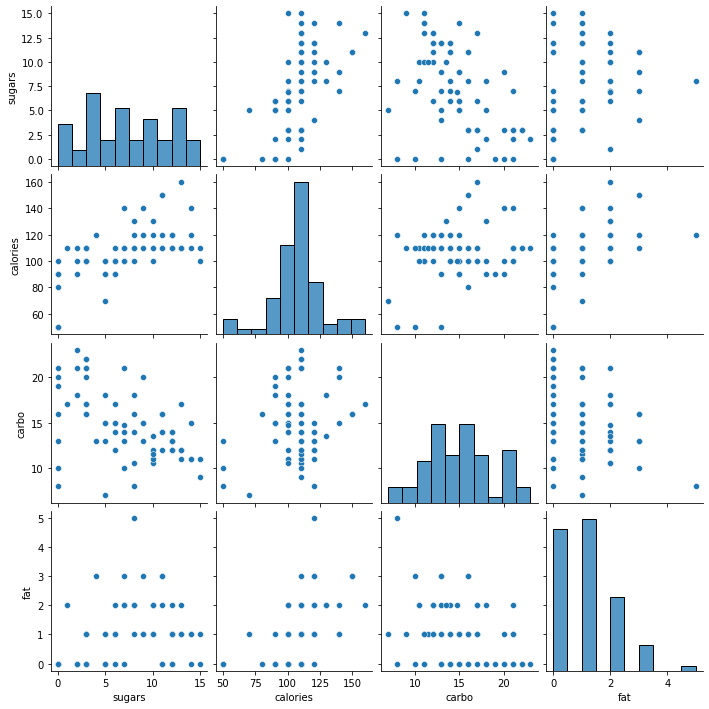

In [13]:
sns.pairplot(df_4, diag_kws={'bins': 10})
plt.show()

In [14]:
'''Which manufacturers produce cereal with lowest calories?'''
crosst=pd.crosstab(df.mfr,df.calories)
print(crosst)
print("We can see that K and Q manufacturers produce cereal having lowest calories.")

calories  50   70   80   90   100  110  120  130  140  150  160
mfr                                                            
A           0    0    0    0    1    0    0    0    0    0    0
G           0    0    0    0    5   13    1    2    1    0    0
K           1    1    0    2    3   10    3    0    2    0    1
N           0    0    1    3    1    0    0    0    0    0    0
P           0    0    0    1    2    3    3    0    0    0    0
Q           2    0    0    0    3    0    3    0    0    0    0
R           0    0    0    1    2    3    0    0    0    2    0
We can see that K and Q manufacturers produce cereal having lowest calories.


In [15]:
'''Use correlation tests and visualization to identify if the two variables calories and 
consumer rating associated ?'''

col1=df["calories"]
col2=df["rating"]
corr=col1.corr(col2)
print(corr)

-0.6743360496799723


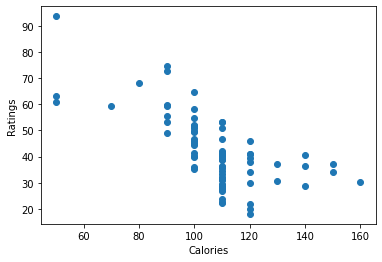

In [16]:
plt.scatter(col1,col2)
plt.xlabel("Calories")
plt.ylabel("Ratings")
plt.show()

In [17]:
''' Use correlation tests and visualization to identify if the two variables shelf and 
consumer rating associated? '''
col3=df["shelf"]
col4=df["rating"]
corr=col3.corr(col4)
print(corr)

0.0019730207509652386


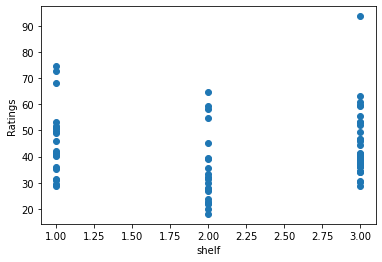

In [18]:
plt.scatter(col3,col4)
plt.xlabel("shelf")
plt.ylabel("Ratings")
plt.show()

In [19]:
'''Which nutrients are essential for a good rating for a cereal'''
df_5=df[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins","rating"]]
corr1=df_5.corr()
print(corr1)
print("Here we can see that protien is most essential for good rating followed by fiber potass and carbo")

           protein       fat    sodium     fiber     carbo    sugars  \
protein   1.000000  0.226913 -0.120710  0.587843 -0.016380 -0.226848   
fat       0.226913  1.000000 -0.248478  0.135546 -0.312341  0.300349   
sodium   -0.120710 -0.248478  1.000000 -0.124328  0.444677 -0.288444   
fiber     0.587843  0.135546 -0.124328  1.000000 -0.110386 -0.000373   
carbo    -0.016380 -0.312341  0.444677 -0.110386  1.000000 -0.501056   
sugars   -0.226848  0.300349 -0.288444 -0.000373 -0.501056  1.000000   
potass    0.671223  0.357217 -0.157435  0.792123 -0.095005  0.030380   
vitamins  0.075951 -0.031186  0.187466 -0.015806  0.221974  0.097124   
rating    0.466606 -0.418439 -0.050622  0.335319  0.160481 -0.774390   

            potass  vitamins    rating  
protein   0.671223  0.075951  0.466606  
fat       0.357217 -0.031186 -0.418439  
sodium   -0.157435  0.187466 -0.050622  
fiber     0.792123 -0.015806  0.335319  
carbo    -0.095005  0.221974  0.160481  
sugars    0.030380  0.097124 -0.7

In [20]:
''' Design a Linear regression model to predict the rating of a cereal based on top 3 
related nutrients. Tabulate the accuracy of the model using a 80 ,20 split'''
W = np.random.normal(size=(1,3))
b = np.random.normal(size=(1, 1))
X=df[['protein','fiber','potass']].values
y=df['rating'].values

X=X[:61,:]
X_test=X[62:,:]
y=y[:61]
Y_test=y[62:]

print("Shape of W : {}".format(W.shape))
print("Shape of b : {}".format(b.shape))

def loss_fn(y_hat, y):
    return 1/61 * np.sum((y_hat - y)**2)
loss = 0
for i in range(61):
    y_hat = np.dot(W, X[i]) + b
    loss += loss_fn(y_hat, y[i])
print("\nLoss = {}".format(loss))


    


Shape of W : (1, 3)
Shape of b : (1, 1)

Loss = 3156.7514616363806


In [21]:
#Gradient Descent
loss_history = []

learning_rate =   0.0000001 
num_epochs = 100  

for epoch in range(num_epochs): 
    loss = 0
    for i in range(61):
        X_i, y_i = X[i].reshape(-1, 1), y[i].reshape(-1, 1)
        
        y_hat = np.dot(W, X_i) + b
        
        dL_dy = 2*(y_hat-y_i)
        
        dy_dW = X_i
        dy_db = 1
        
        dL_dW = np.dot(dL_dy, dy_dW.T)
        dL_db = dL_dy * dy_db
        
        W -= learning_rate * dL_dW
        b -= learning_rate * dL_db
        
        loss += loss_fn(y_hat, y_i)
    
    loss_history.append(loss)
    print("Epoch: {}, Loss: {}".format(epoch+1, loss))

Epoch: 1, Loss: 2877.932257103175
Epoch: 2, Loss: 2385.0665026128754
Epoch: 3, Loss: 1993.8465437540685
Epoch: 4, Loss: 1683.3085921638528
Epoch: 5, Loss: 1436.8125722393258
Epoch: 6, Loss: 1241.1503622381442
Epoch: 7, Loss: 1085.837960031938
Epoch: 8, Loss: 962.553639094318
Epoch: 9, Loss: 864.6919842798592
Epoch: 10, Loss: 787.0099072291277
Epoch: 11, Loss: 725.3456706426686
Epoch: 12, Loss: 676.3958633837703
Epoch: 13, Loss: 637.5383740885061
Epoch: 14, Loss: 606.6918761255363
Epoch: 15, Loss: 582.2042934719736
Epoch: 16, Loss: 562.7642702211258
Epoch: 17, Loss: 547.3308992504117
Epoch: 18, Loss: 535.0779441227185
Epoch: 19, Loss: 525.3495650146651
Epoch: 20, Loss: 517.62517598703
Epoch: 21, Loss: 511.4915502768806
Epoch: 22, Loss: 506.6206787240241
Epoch: 23, Loss: 502.7521947632481
Epoch: 24, Loss: 499.67942414208784
Epoch: 25, Loss: 497.2383117770139
Epoch: 26, Loss: 495.298632349523
Epoch: 27, Loss: 493.75701363091287
Epoch: 28, Loss: 492.531398669542
Epoch: 29, Loss: 491.556650

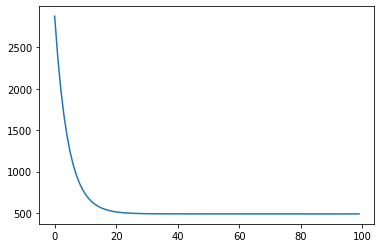

In [22]:
#Loss vs No. Of Iteration Plot
plt.plot(loss_history)
plt.show()

In [23]:
 '''Is there a relation between manufacturer and rating'''
col5=df["mfr"]
df['rating']=pd.cut(df.rating,bins=[0,33,51,94],labels=['Low','Medium','High'])
col6=df["rating"]
crosstab=pd.crosstab(df.rating,df.mfr)
print(stats.chi2_contingency(crosstab))
print(crosstab)
c, p, dof, expected = chi2_contingency(crosstab)
print(p)


(34.644888123148995, 0.0005333193842606924, 12, array([[ 0.25      ,  5.5       ,  5.75      ,  1.25      ,  2.25      ,
         2.        ,  2.        ],
       [ 0.51315789, 11.28947368, 11.80263158,  2.56578947,  4.61842105,
         4.10526316,  4.10526316],
       [ 0.23684211,  5.21052632,  5.44736842,  1.18421053,  2.13157895,
         1.89473684,  1.89473684]]))
mfr     A   G   K  N  P  Q  R
rating                       
Low     0  10   5  0  2  2  0
Medium  0  11  12  0  4  4  8
High    1   1   6  5  3  2  0
0.0005333193842606924
